In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
netflix_data = pd.read_csv("netflix_content.csv")
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [5]:
netflix_data.isnull().sum() 

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

In [7]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')
mode_date = netflix_data['Release Date'].mode()[0]
netflix_data['Release Date'] = netflix_data['Release Date'].fillna(mode_date)

In [9]:
netflix_data.isnull().sum()

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Language Indicator     0
Content Type           0
dtype: int64

In [11]:
import pandas as pd

# Convert to datetime safely
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')

# Fill missing values with mode date (optional)
netflix_data.fillna({'Release Date': netflix_data['Release Date'].mode()[0]}, inplace=True)

# Extract components
netflix_data['Release Year'] = netflix_data['Release Date'].dt.year
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day

In [13]:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Year,Release Month,Release Day
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show,2023,3,23
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show,2023,1,5
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show,2022,12,30
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show,2022,11,23
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie,2023,5,4


In [15]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         24812 non-null  datetime64[ns]
 3   Hours Viewed         24812 non-null  object        
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Release Year         24812 non-null  int32         
 7   Release Month        24812 non-null  int32         
 8   Release Day          24812 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(5)
memory usage: 1.4+ MB


In [17]:
netflix_data.describe

<bound method NDFrame.describe of                                               Title Available Globally?  \
0                         The Night Agent: Season 1                 Yes   
1                         Ginny & Georgia: Season 2                 Yes   
2                The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   
3                               Wednesday: Season 1                 Yes   
4               Queen Charlotte: A Bridgerton Story                 Yes   
...                                             ...                 ...   
24807            We Are Black and British: Season 1                  No   
24808             Whitney Cummings: Can I Touch It?                 Yes   
24809                       Whitney Cummings: Jokes                  No   
24810  Whose Vote Counts, Explained: Limited Series                 Yes   
24811   Zach Galifianakis: Live at the Purple Onion                  No   

      Release Date  Hours Viewed Language Indicator Content Type 

In [19]:
netflix_data.dtypes

Title                          object
Available Globally?            object
Release Date           datetime64[ns]
Hours Viewed                   object
Language Indicator             object
Content Type                   object
Release Year                    int32
Release Month                   int32
Release Day                     int32
dtype: object

In [21]:
netflix_data.duplicated().sum()

467

In [23]:
Num_column = netflix_data.select_dtypes(include=['int64','float64']).columns
Num_column

Index([], dtype='object')

In [25]:
Categorical_columns = netflix_data.select_dtypes(include = ['object']).columns
Categorical_columns

Index(['Title', 'Available Globally?', 'Hours Viewed', 'Language Indicator',
       'Content Type'],
      dtype='object')

In [27]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


# 🎥 Content Type Distribution

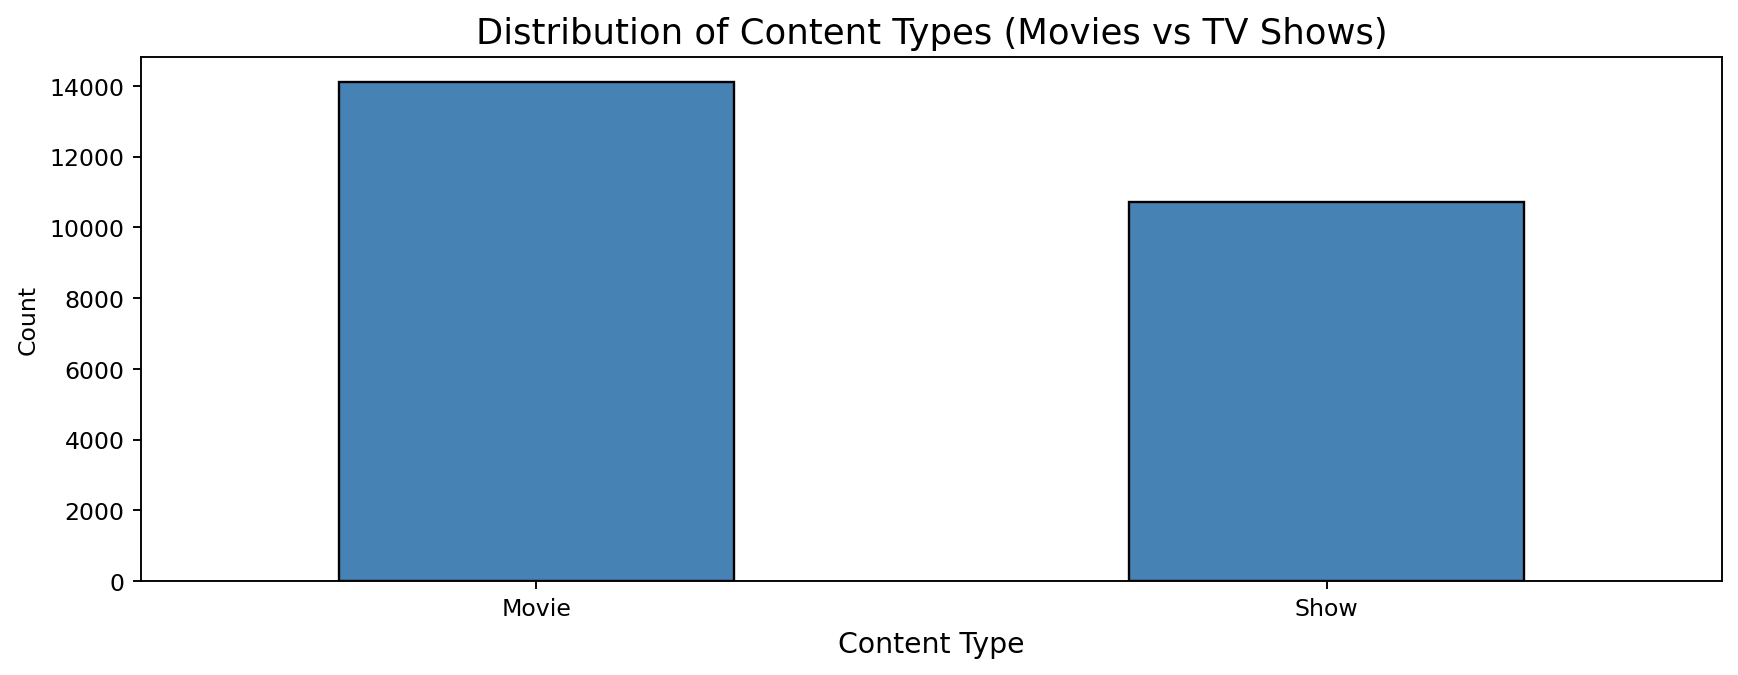

In [28]:
plt.figure(figsize=(12,4), dpi=170)
netflix_data['Content Type'].value_counts().plot(kind='bar', color='steelblue', edgecolor='k')
plt.title("Distribution of Content Types (Movies vs TV Shows)", fontsize=15)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 🌐 Global Availability

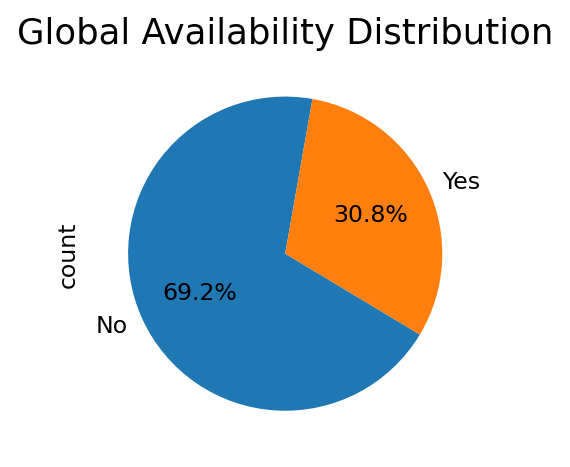

In [86]:
plt.figure(figsize=(12,3), dpi=170)
netflix_data['Available Globally?'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80)
plt.title("Global Availability Distribution", fontsize=15)
plt.show()

# 🌍 Language Analysis

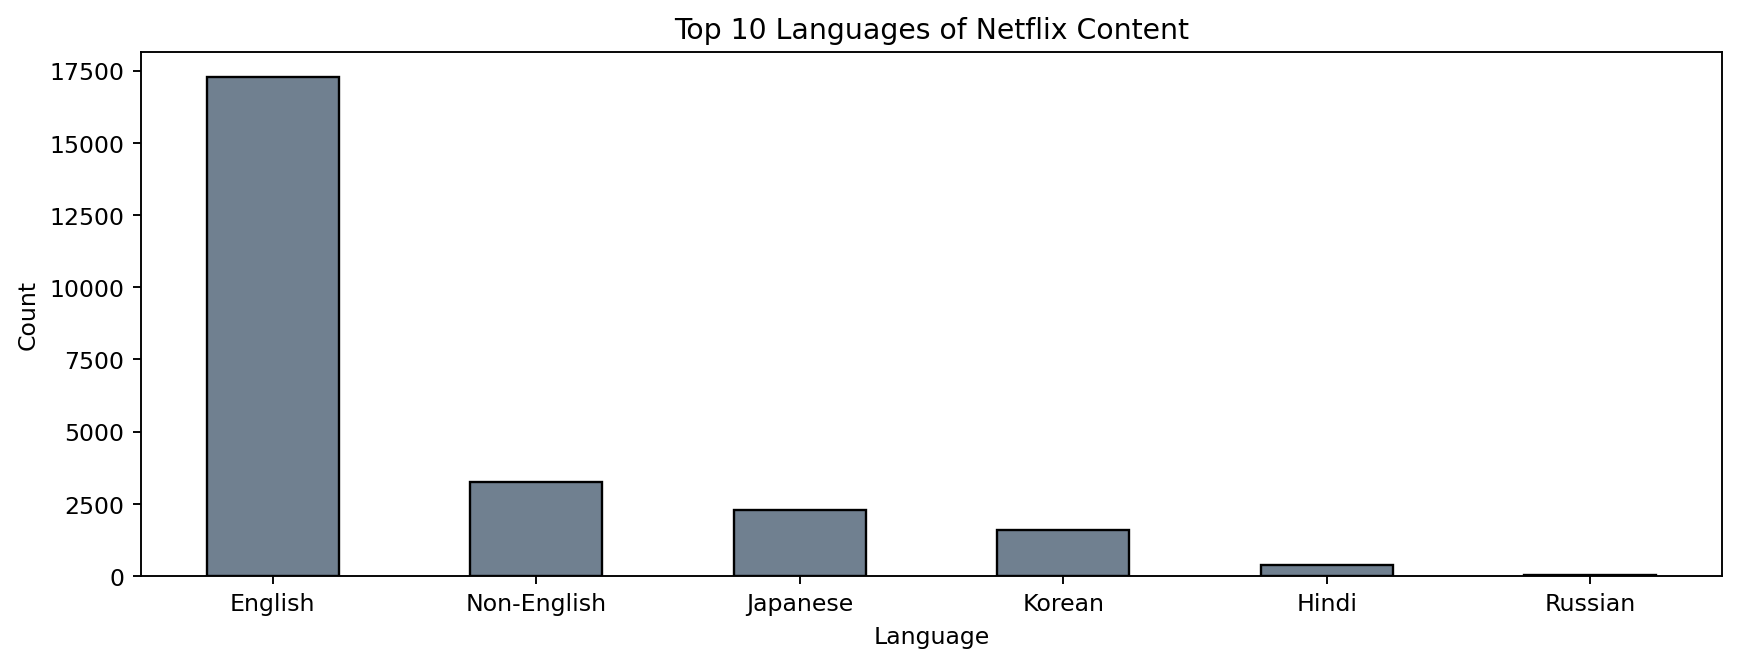

In [98]:
plt.figure(figsize=(12,4), dpi=170)
netflix_data['Language Indicator'].value_counts().head(10).plot(kind='bar', color='slategrey', edgecolor='k')
plt.title("Top 10 Languages of Netflix Content")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 📈 Hours Viewed vs Content Type

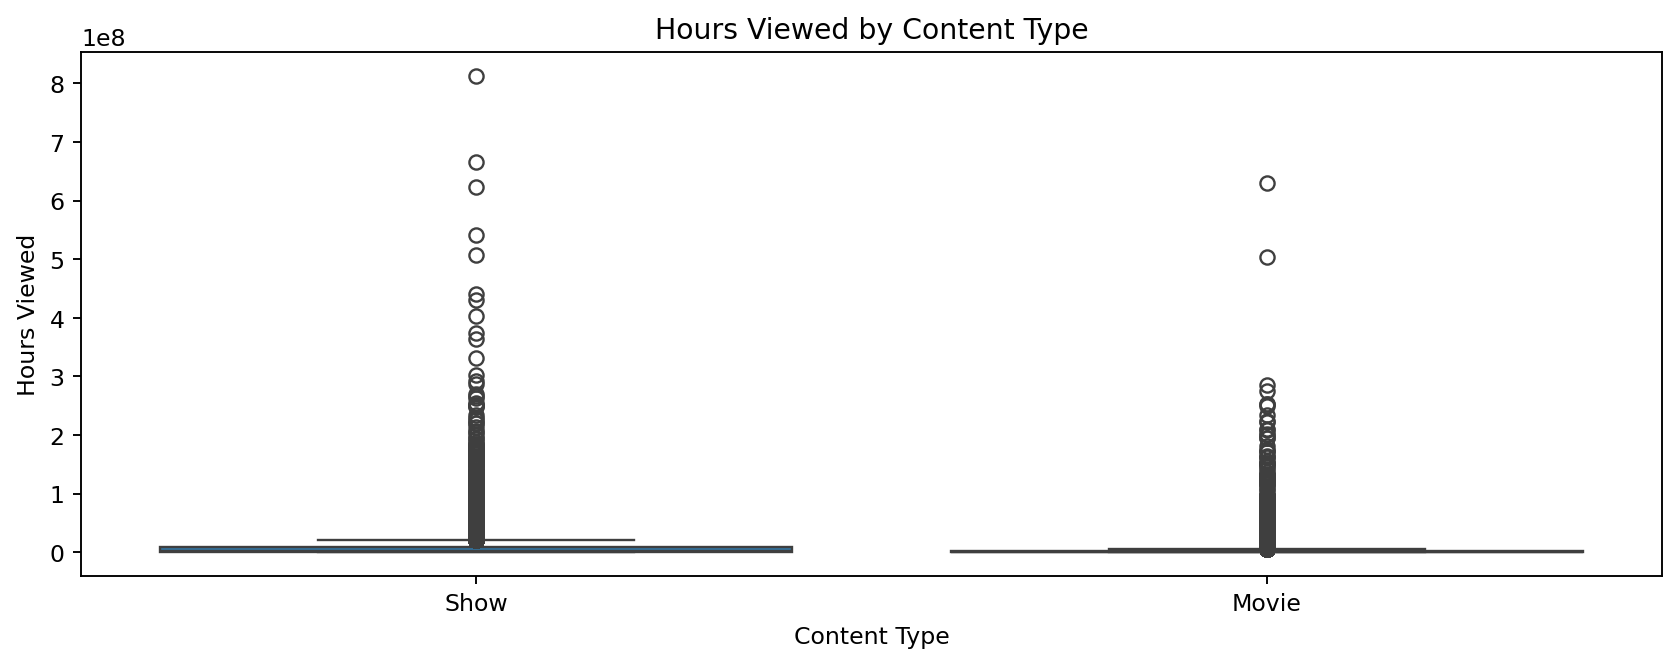

In [103]:
import seaborn as sns
plt.figure(figsize=(12,4), dpi=170)
sns.boxplot(x='Content Type', y='Hours Viewed', data=netflix_data)
plt.title("Hours Viewed by Content Type")
plt.show()

# 📆 Release Trends Over the Years

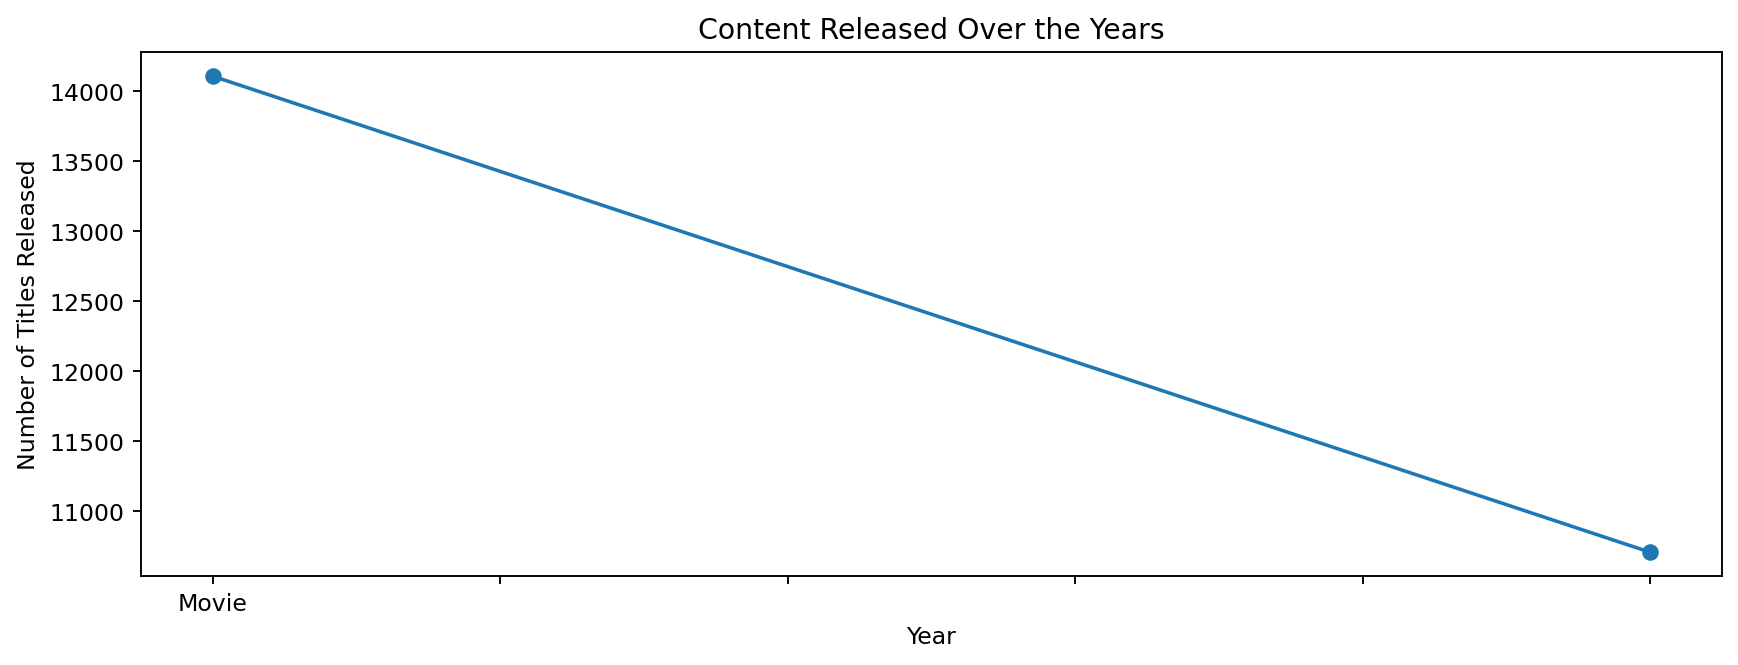

In [111]:
plt.figure(figsize=(12,4), dpi=170)
netflix_data.groupby('Content Type')['Title'].count().plot(kind='line', marker='o')
plt.title("Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.show()

In [29]:
insight = netflix_data.groupby('Language Indicator')['Hours Viewed'].mean().sort_values(ascending=False)
corr = pd.DataFrame(insight)

In [31]:
corr

,Hours Viewed
Language Indicator,
Korean,9.720860e+06
English,7.206492e+06
Non-English,3.210055e+06
Japanese,3.091859e+06
Russian,2.938462e+06
Hindi,2.476203e+06


###  Let’s visualize the distribution of total viewership hours between Shows and Movies:

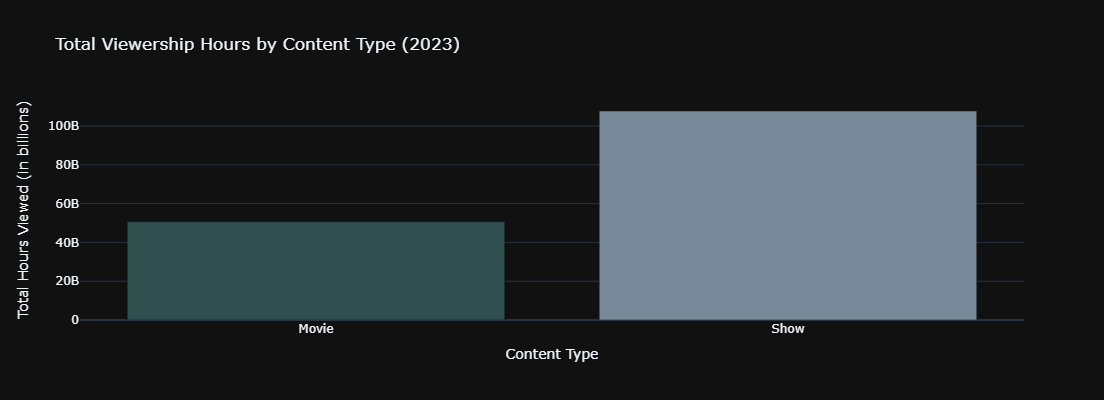

In [48]:
# aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Bar(
        x=content_type_viewership.index,
        y=content_type_viewership.values,
        marker_color=['darkslategrey', 'lightslategrey']
    )
])

fig.update_layout(
    title='Total Viewership Hours by Content Type (2023)',
    xaxis_title='Content Type',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=400,
    width=1100,
    template='plotly_dark'
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Viewership Hours.html")
fig.show()

The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

Next, let’s analyze the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption:

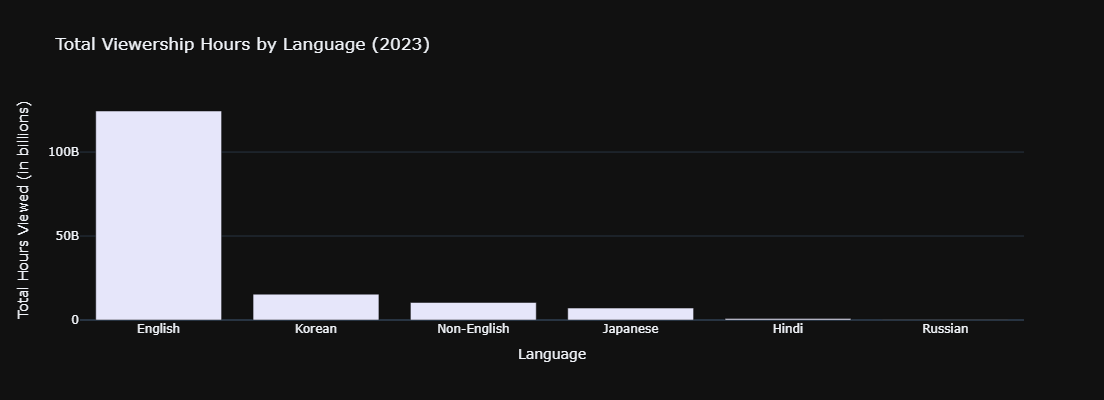

In [50]:
# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

fig = go.Figure(data=[
    go.Bar(
        x=language_viewership.index,
        y=language_viewership.values,
        marker_color='lavender'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Language (2023)',
    xaxis_title='Language',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=400,
    width=1100,
    template='plotly_dark'
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Viewership Hours by Language.html")
fig.show()

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

Next, I’ll analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months:

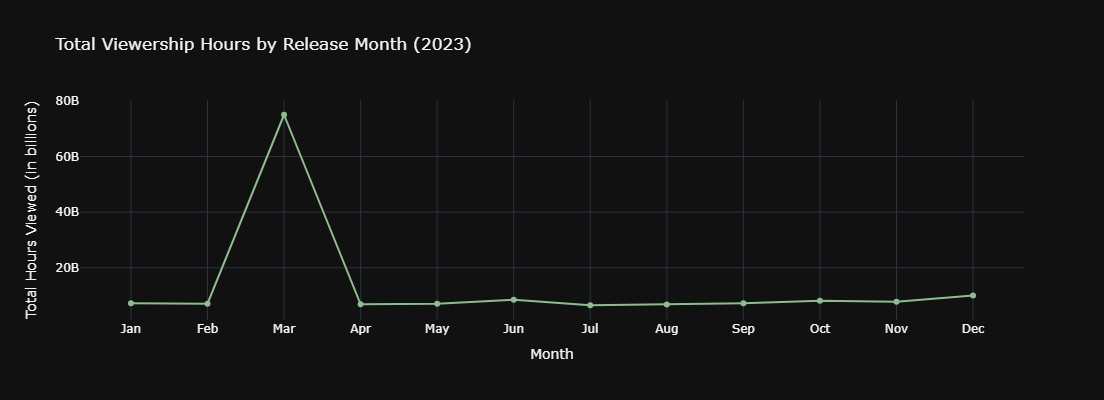

In [52]:
# convert the "Release Date" to a datetime format and extract the month
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

# aggregate viewership hours by release month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        mode='lines+markers',
        marker=dict(color='darkseagreen'),
        line=dict(color='darkseagreen')
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=400,
    width=1100,
    template='plotly_dark'
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Viewership Hours by Release Month.html")
fig.show()

The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

To delve deeper, we can analyze the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, that may have contributed to high viewership:

In [158]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


### The top 5 most-viewed titles on Netflix in 2023 are:

1.The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.

2.Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.

3.King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.

4.The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.

5.ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.

English-language shows dominate the top viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

Now, let’s have a look at the viewership trends by content type:

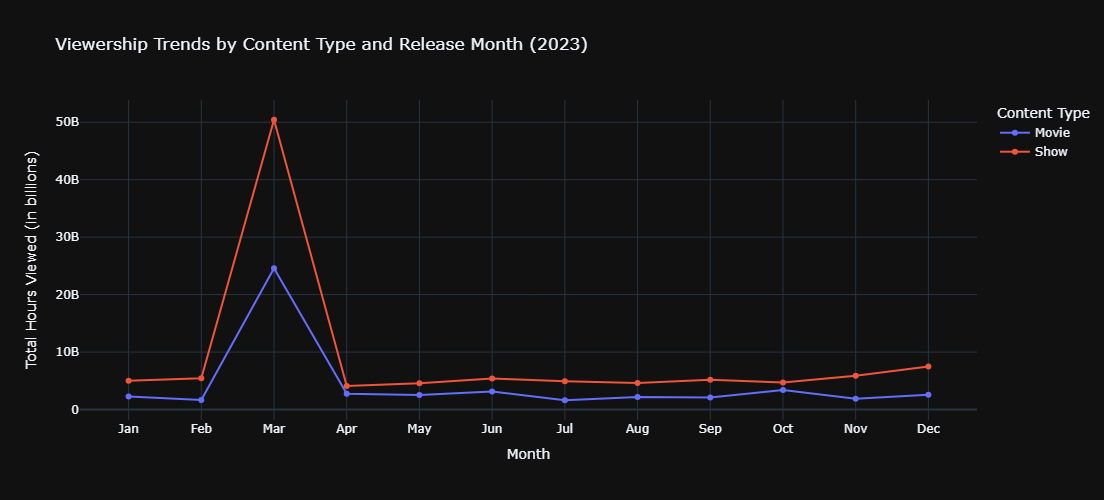

In [54]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum')

fig = go.Figure()

for content_type in monthly_viewership_by_type.columns:
    fig.add_trace(
        go.Scatter(
            x=monthly_viewership_by_type.index,
            y=monthly_viewership_by_type[content_type],
            mode='lines+markers',
            name=content_type
        )
    )

fig.update_layout(
    title='Viewership Trends by Content Type and Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=500,
    width=1100,
    legend_title='Content Type',
    template='plotly_dark'
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Viewership Trends by Content.html")
fig.show()

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

Now, let’s explore the total viewership hours distributed across different release seasons:

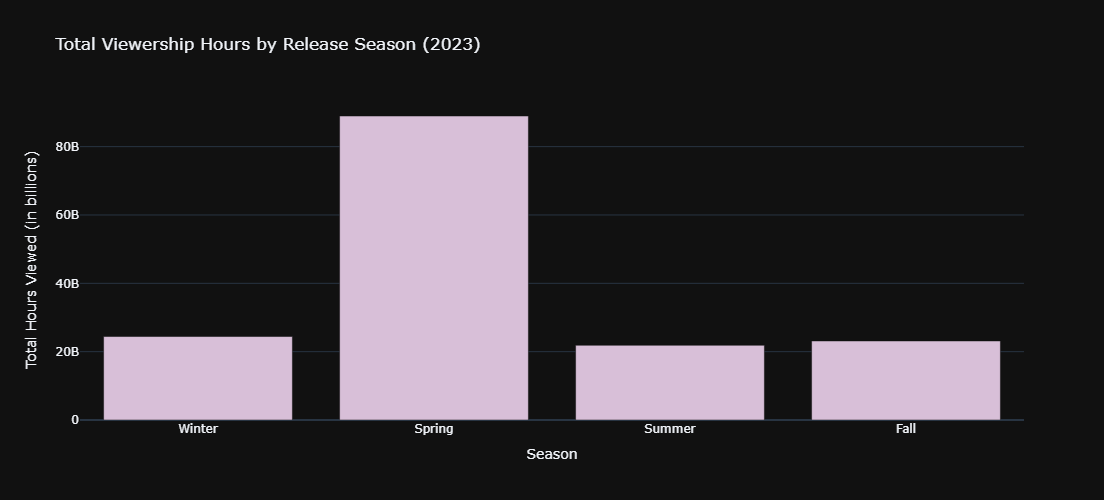

In [56]:
# define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# apply the season categorization to the dataset
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

# aggregate viewership hours by release season
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

# order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

fig = go.Figure(data=[
    go.Bar(
        x=seasonal_viewership.index,
        y=seasonal_viewership.values,
        marker_color='thistle'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Season (2023)',
    xaxis_title='Season',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=1100,
    template='plotly_dark',
    xaxis=dict(
        categoryorder='array',
        categoryarray=seasons_order
    )
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Viewership Hours by season 2023.html")
fig.show()

The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

Now, let’s analyze the number of content releases and their viewership hours across months:

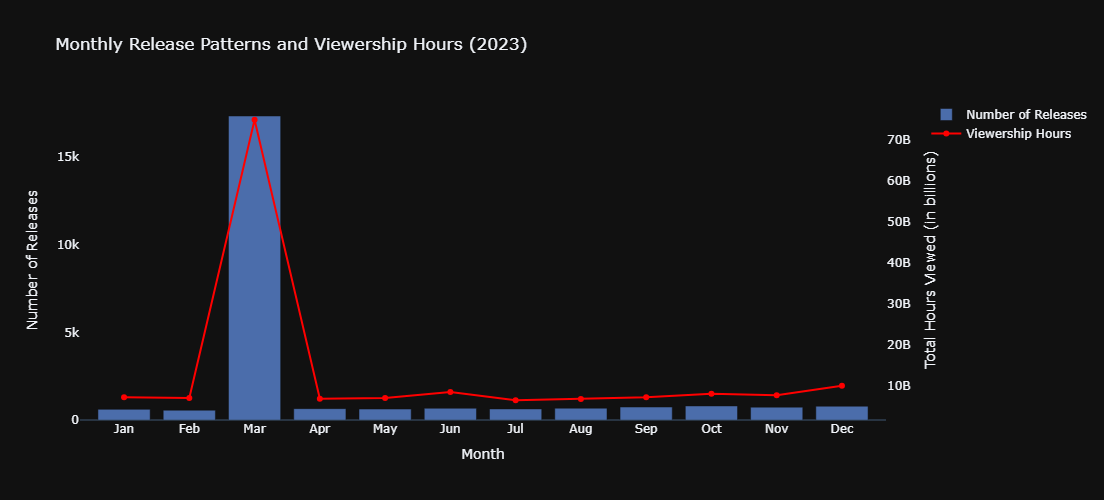

In [58]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='cornflowerblue', 
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    template='plotly_dark',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=500,
    width=1100
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Monthly Release Patterns & Viewership.html")
fig.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.


Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:

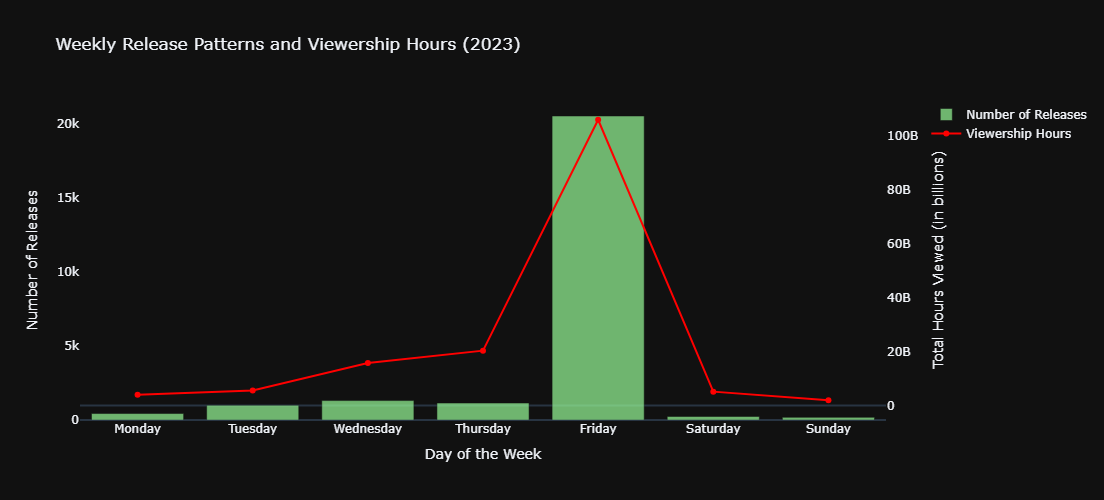

In [60]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='palegreen',
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    template='plotly_dark',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=500,
    width=1100
)

fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Weekly Release Patterns & Hours.html")
fig.show()

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases:

In [55]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's day
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

New Year’s Period: The Glory: Season 1, La Reina del Sur: Season 3, and Kaleidoscope: Limited Series were released close to New Year’s Day, resulting in high viewership.

Valentine’s Day: Perfect Match: Season 1 and The Romantics: Limited Series were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.

# 📊 Content Type Distribution

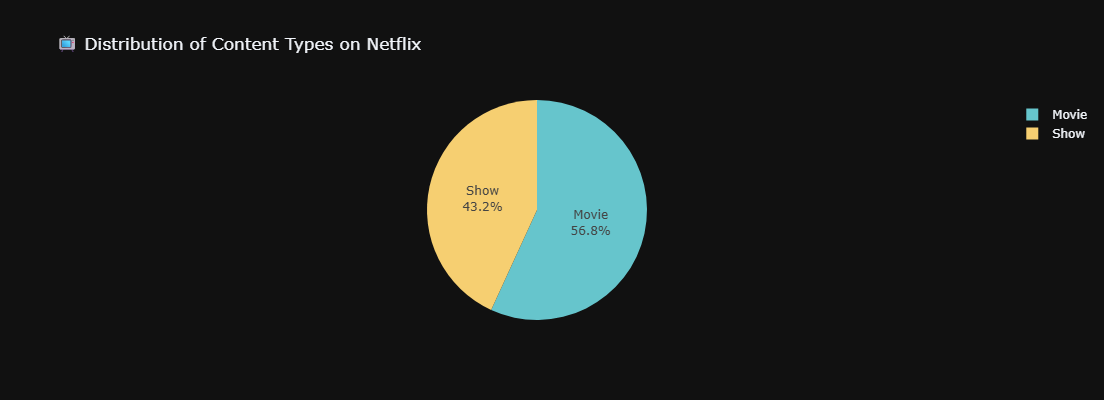

In [62]:
fig = px.pie(netflix_data, 
             names='Content Type', 
             title='📺 Distribution of Content Types on Netflix',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(template='plotly_dark', height=400, width=1100)
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Distribution of Content Type.html")
fig.show()

# 🌍 Global Availability

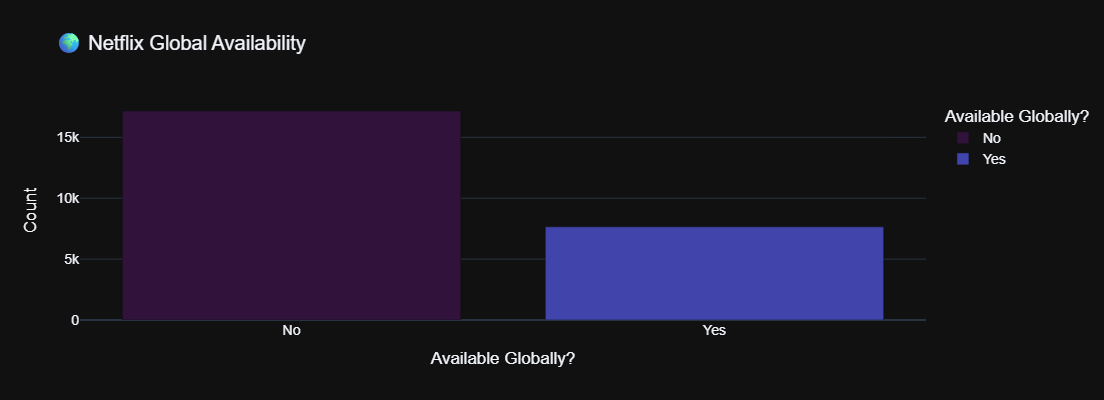

In [64]:
# Create DataFrame from value counts
avail_counts = netflix_data['Available Globally?'].value_counts().reset_index()

# Rename columns for clarity
avail_counts.columns = ['Available Globally?', 'Count']

# Now plot correctly
fig = px.bar(
    avail_counts,
    x='Available Globally?',   # must match column name
    y='Count',
    color='Available Globally?',
    title='🌍 Netflix Global Availability',
    color_discrete_sequence=px.colors.sequential.Turbo,
)

fig.update_layout(template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Netflix Global Availability.html")
fig.show()

# 🕒 Release Trend Over the Years

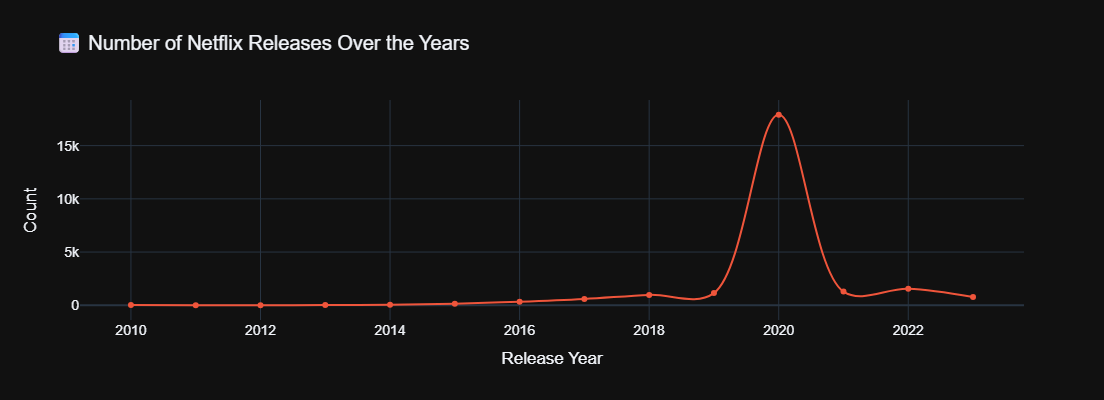

In [66]:
netflix_data['Release Year'] = netflix_data['Release Date'].dt.year
yearly = netflix_data.groupby('Release Year').size().reset_index(name='Count')
fig = px.line(yearly, x='Release Year', y='Count', markers=True,
              title='📅 Number of Netflix Releases Over the Years',
              line_shape='spline', color_discrete_sequence=['#EF553B'])

fig.update_layout(template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Number of Netflix Release over Years.html")
fig.show()

# 🧮 Top Languages on Netflix

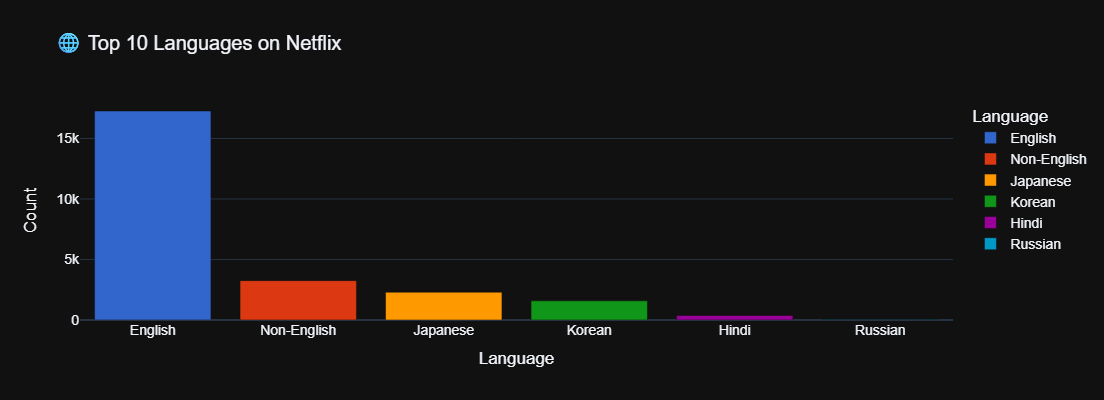

In [68]:
lang_count = netflix_data['Language Indicator'].value_counts().nlargest(10).reset_index()
lang_count.columns = ['Language', 'Count']

fig = px.bar(lang_count, x='Language', y='Count', color='Language',
             title='🌐 Top 10 Languages on Netflix',
             color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(xaxis={'categoryorder':'total descending'}, template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Top 10 Languages on Netflix.html")
fig.show()

# 🔥 Average Hours Viewed by Content Type

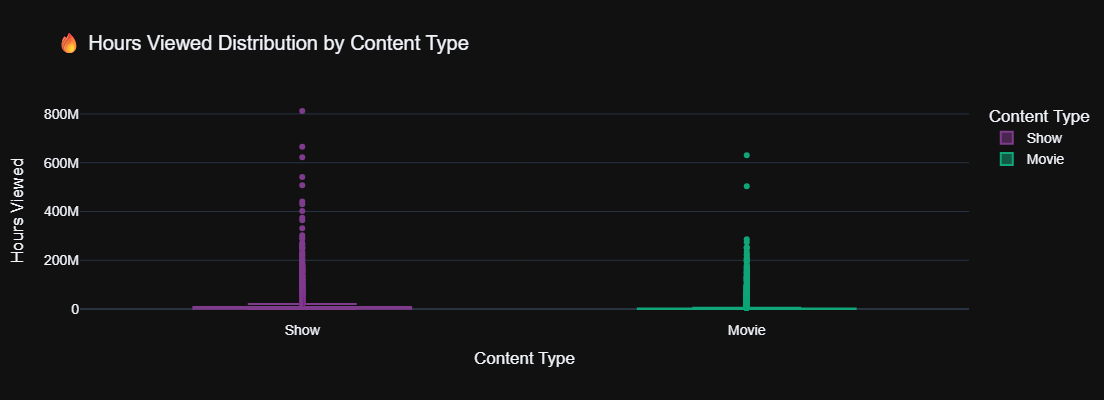

In [180]:
fig = px.box(netflix_data, x='Content Type', y='Hours Viewed', color='Content Type',
             title='🔥 Hours Viewed Distribution by Content Type',
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.show()

# 🧭 Top 10 Most Viewed Titles

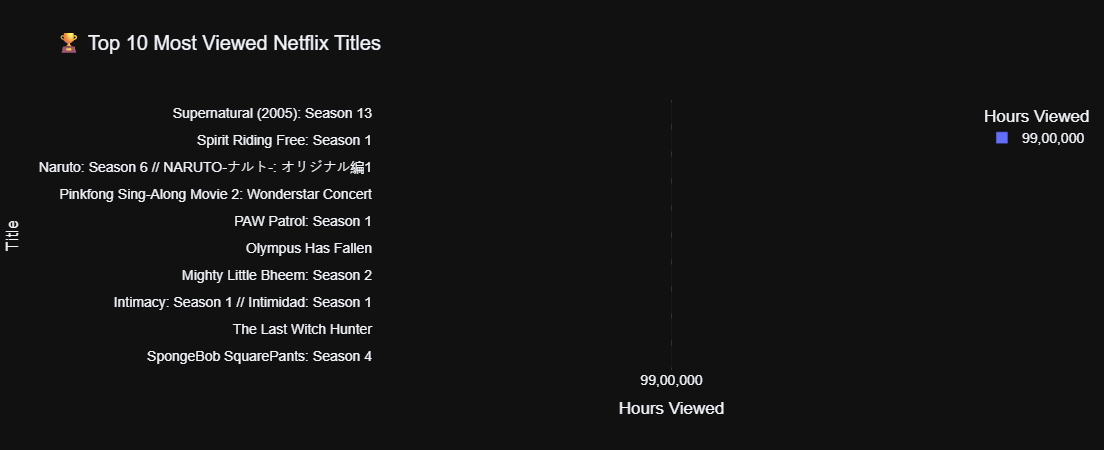

In [40]:
top_titles = netflix_data.sort_values('Hours Viewed', ascending=False).head(10)
fig = px.bar(top_titles, x='Hours Viewed', y='Title', orientation='h',
             color='Hours Viewed', title='🏆 Top 10 Most Viewed Netflix Titles',
             color_continuous_scale='blues')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_dark', height=450, width=1000, font = dict(family="Poppins, sans-serif", size=14))
fig.show()

In [5]:
netflix_data.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

# Content Popularity by Type

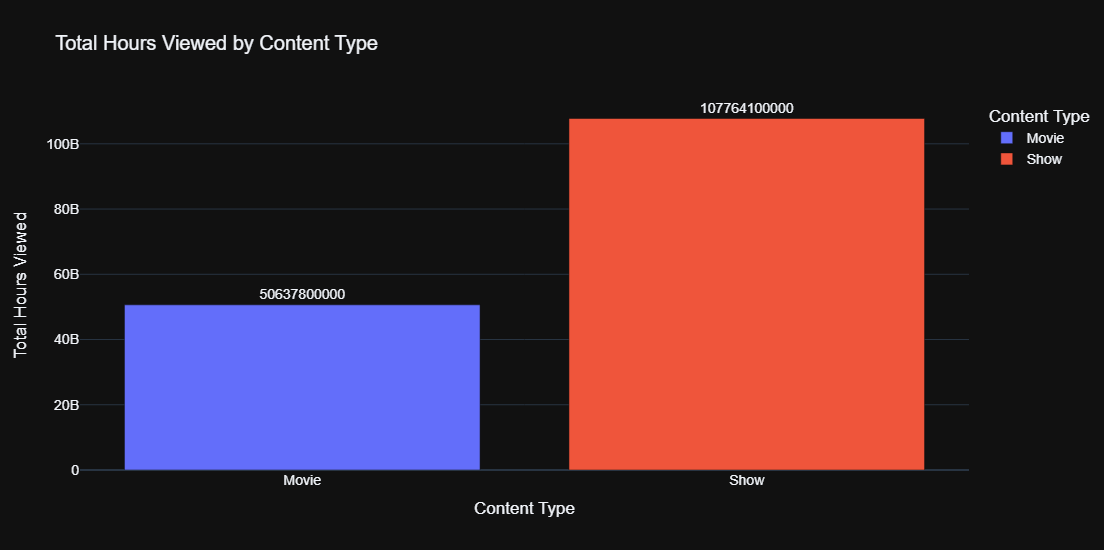

In [70]:
type_hours = netflix_data.groupby('Content Type')['Hours Viewed'].sum().reset_index()
fig = px.bar(type_hours, x='Content Type', y='Hours Viewed', text='Hours Viewed',
             title='Total Hours Viewed by Content Type', color='Content Type')
fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title="Total Hours Viewed", xaxis_title="Content Type", template='plotly_dark', height=550, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Total Hours Viewed by Content type.html")
fig.show()

# Availability Impact

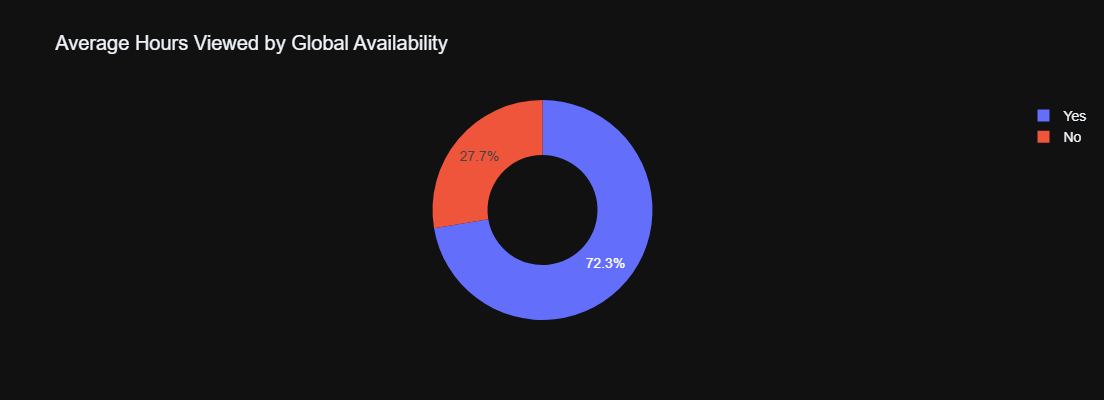

In [72]:
global_hours = netflix_data.groupby('Available Globally?')['Hours Viewed'].mean().reset_index()
fig = px.pie(global_hours, values='Hours Viewed', names='Available Globally?',
             title='Average Hours Viewed by Global Availability', hole=0.5)
fig.update_layout(template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Average Hours Viewed by Gloabal Availability.html")
fig.show()

# Language Preference Analysis

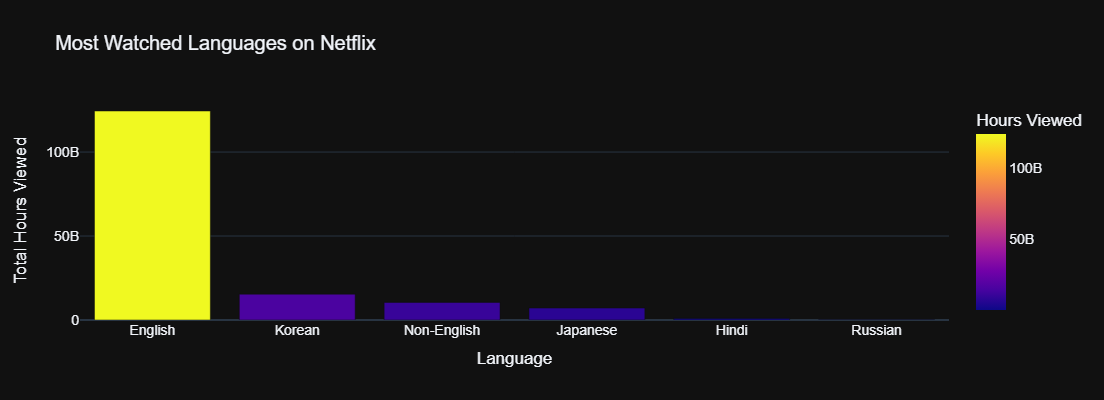

In [74]:
lang_popularity = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().reset_index().sort_values(by='Hours Viewed', ascending=False)
fig = px.bar(lang_popularity, x='Language Indicator', y='Hours Viewed',
             title='Most Watched Languages on Netflix', color='Hours Viewed')
fig.update_layout(xaxis_title='Language', yaxis_title='Total Hours Viewed', template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Most Watch Language.html")
fig.show()

# Time Trend — Release Year vs Engagement

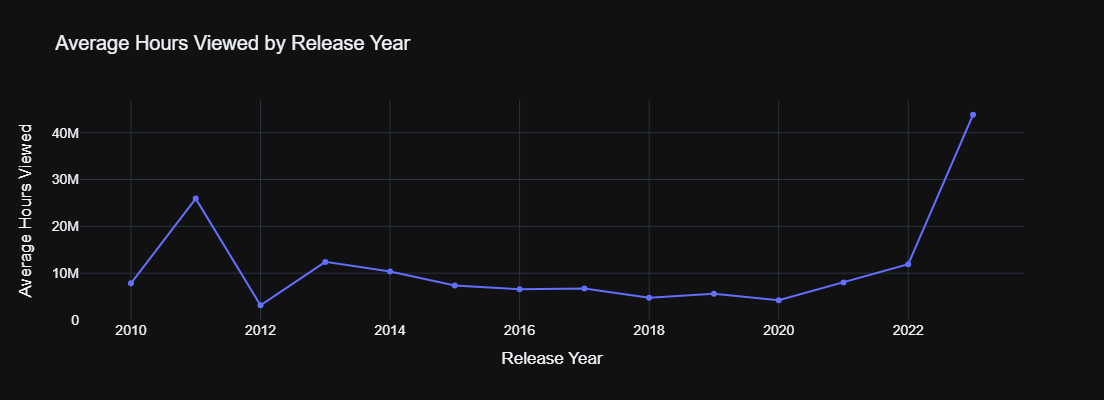

In [76]:
netflix_data['Release Year'] = pd.to_datetime(netflix_data['Release Date']).dt.year
year_trend = netflix_data.groupby('Release Year')['Hours Viewed'].mean().reset_index()

fig = px.line(year_trend, x='Release Year', y='Hours Viewed',
              title='Average Hours Viewed by Release Year', markers=True)
fig.update_layout(yaxis_title='Average Hours Viewed', xaxis_title='Release Year', template='plotly_dark', height=400, width=1100, font = dict(family="Poppins, sans-serif", size=14))
fig.write_html("C:/Users/vaibh/GRRAS/Projects/Data Analytics projects/Netflix Data Analysis/Plots/Average Hours View by Release.html")
fig.show()

# Correlation Heatmap (Final Overview)

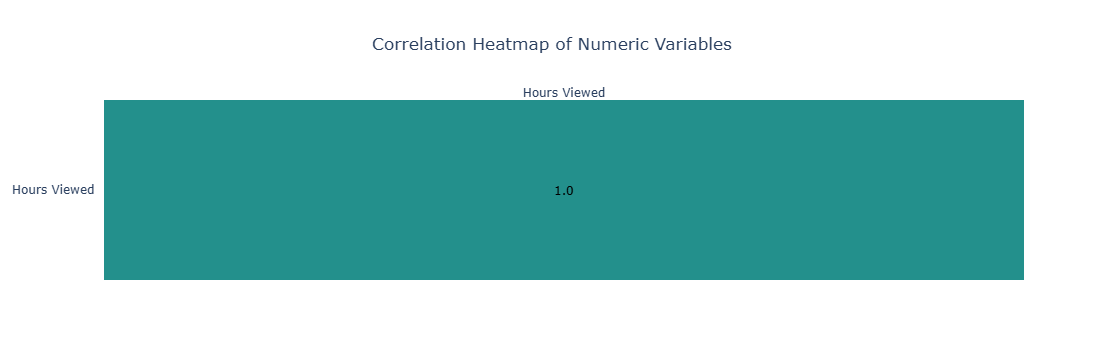

In [84]:
import plotly.figure_factory as ff
numeric_df = netflix_data.select_dtypes(include=['int64', 'float64'])
fig = ff.create_annotated_heatmap(
    z=numeric_df.corr().values,
    x=list(numeric_df.columns),
    y=list(numeric_df.columns),
    colorscale='Viridis'
)
fig.update_layout(title='Correlation Heatmap of Numeric Variables', title_x=0.5)
fig.show()

# Conclusion

So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. 

Most content is released on <b> Fridays </b>, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.